## COLLECTION OF NATIONAL HEALTH & NUTRITION EXAMINATION SURVEY DATA FOR PROJECT

This worksheet is used for collecting, combining, and filtering of data from the National Health & Nutrition Examination Survey.
Data is posted in XPT format in two-year increments for various topics related to the survey.  Data was collected for 1999-2016.

*Note on the data: NHANES sample weights are used by analysts to produce estimates of the health-related statistics that would have been obtained if the entire sampling frame (i.e., the noninstitutionalized civilian U.S. population) had been surveyed.*

In [195]:
import pandas as pd
from functools import reduce
import pickle

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

#### KEY:
Key for letters that correspond to 2-year ranges.  Letters selected for their correspondence to labeling of the years by NHANES. >

E = 2007 - 2008</br>
F = 2009 - 2010</br>
G = 2011 - 2012</br>
H = 2013 - 2014</br>
I = 2015 - 2016</br>

### STEP 1: PULLING THE DATA

- 

#### E: 2007-2008 file pull and merge:

In [196]:
# Pull in XPT files to create dataframes

E_blood_press = pd.read_sas('NHANES_files/blood_pressure/E_BloodPressure_BPX_E.XPT') #blood pressure (target)

E_body_meas = pd.read_sas('NHANES_files/body_measures/E_BodyMeasures_BMX_E.XPT') #body measures

E_diet = pd.read_sas('NHANES_files/dietary_selections/E_diet_DBQ_E.XPT') #dietary selections
                    
E_smoking = pd.read_sas('NHANES_files/smoking_status/E_smoking_SMQ_E.XPT') #smoking status

E_physical_act = pd.read_sas('NHANES_files/physical_activity/E_physical_act_PAQ_E.XPT') #physical activity

E_age_gender_race = pd.read_sas('NHANES_files/age_gender_race/E_demographic_DEMO_E.XPT') #age, gender, & race

E_alcohol = pd.read_sas('NHANES_files/alcohol_consumption/E_alcohol_ALQ_E.XPT') #alcohol consumption

E_medical_cond = pd.read_sas('NHANES_files/medical_conditions/E_med_con_MCQ_E.XPT') #medical conditions

E_work_info = pd.read_sas('NHANES_files/work_info/E_work_OCQ_E.XPT') #work info

In [197]:
# merge lists together on each respondents 'sequence number'

E_merged_total = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'),
                        [E_blood_press, E_body_meas,
                         E_diet, E_smoking, E_physical_act,
                         E_age_gender_race, E_alcohol,
                         E_medical_cond, E_work_info,])

In [198]:
#narrow df to only the features & target we want to explor for model

E_filtered = E_merged_total[["SEQN","BPXSY1","BPXSY2","BPXSY3",
                             "BPXDI1","BPXDI2","BPXDI3",
                             "BMXBMI","BMXWAIST","BMXHT",
                             "BMXWT", "DBD895","DBD905",
                             "DBD910","SMQ020","SMQ040",
                             "PAQ605","PAQ620","PAQ635",
                             "PAQ650","PAD680","RIAGENDR",
                             "RIDAGEYR","RIDRETH1",
                             "ALQ101","ALQ130","OCD150",
                             "OCQ180",
                            ]]

-

#### F: 2009-2010 file pull and merge:

In [199]:
# Pull in XPT files to create dataframes

F_blood_press = pd.read_sas('NHANES_files/blood_pressure/F_BloodPressure_BPX_F.XPT') #blood pressure (target)

F_body_meas = pd.read_sas('NHANES_files/body_measures/F_BodyMeasures_BMX_F.XPT') #body measures

F_diet = pd.read_sas('NHANES_files/dietary_selections/F_diet_DBQ_F.XPT') #dietary selections
                    
F_smoking = pd.read_sas('NHANES_files/smoking_status/F_smoking_SMQ_F.XPT') #smoking status

F_physical_act = pd.read_sas('NHANES_files/physical_activity/F_physical_act_PAQ_F.XPT') #physical activity

F_age_gender_race = pd.read_sas('NHANES_files/age_gender_race/F_demographic_DEMO_F.XPT') #age, gender, & race

F_alcohol = pd.read_sas('NHANES_files/alcohol_consumption/F_alcohol_ALQ_F.XPT') #alcohol consumption

F_medical_cond = pd.read_sas('NHANES_files/medical_conditions/F_med_con_MCQ_F.XPT') #medical conditions

F_work_info = pd.read_sas('NHANES_files/work_info/F_work_OCQ_F.XPT') #work info

In [200]:
# merge lists together on each respondents 'sequence number'

F_merged_total = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'),
                        [F_blood_press, F_body_meas,
                         F_diet, F_smoking, F_physical_act,
                         F_age_gender_race, F_alcohol,
                         F_medical_cond, F_work_info])

In [201]:
F_merged_total.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,BPQ150B,BPQ150C,BPQ150D,BPAARM,...,OCD392,OCD395,OCQ510,OCQ520,OCQ530,OCQ540,OCQ550,OCQ560,OCQ570,OCQ580
0,51624.0,1.0,583.0,NaN,NaN,2.0,2.0,2.0,2.0,1.0,...,19.0,120.0,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0
1,51625.0,1.0,278.0,NaN,92.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51626.0,1.0,689.0,NaN,NaN,1.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51627.0,1.0,699.0,NaN,NaN,2.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51628.0,1.0,1098.0,NaN,NaN,1.0,2.0,2.0,2.0,1.0,...,21.0,60.0,1.0,38.0,1.0,38.0,1.0,38.0,1.0,38.0


In [202]:
#narrow df to only the features & target we want to explor for model

F_filtered = F_merged_total[["SEQN","BPXSY1","BPXSY2","BPXSY3",
                             "BPXDI1","BPXDI2","BPXDI3",
                             "BMXBMI","BMXWAIST","BMXHT",
                             "BMXWT", "DBD895","DBD905",
                             "DBD910","SMQ020","SMQ040",
                             "PAQ605","PAQ620","PAQ635",
                             "PAQ650","PAD680","RIAGENDR",
                             "RIDAGEYR","RIDRETH1",
                             "ALQ101","ALQ130","OCD150",
                             "OCQ180",
                            ]]

-

#### G: 2011-2012 file pull and merge:

In [203]:
# Pull in XPT files to create dataframes

G_blood_press = pd.read_sas('NHANES_files/blood_pressure/G_BloodPressure_BPX_G.XPT') #blood pressure (target)

G_body_meas = pd.read_sas('NHANES_files/body_measures/G_BodyMeasures_BMX_G.XPT') #body measures

G_diet = pd.read_sas('NHANES_files/dietary_selections/G_diet_DBQ_G.XPT') #dietary selections
                    
G_smoking = pd.read_sas('NHANES_files/smoking_status/G_smoking_SMQ_G.XPT') #smoking status

G_physical_act = pd.read_sas('NHANES_files/physical_activity/G_physical_act_PAQ_G.XPT') #physical activity

G_age_gender_race = pd.read_sas('NHANES_files/age_gender_race/G_demographic_DEMO_G.XPT') #age, gender, & race

G_alcohol = pd.read_sas('NHANES_files/alcohol_consumption/G_alcohol_ALQ_G.XPT') #alcohol consumption

G_medical_cond = pd.read_sas('NHANES_files/medical_conditions/G_med_con_MCQ_G.XPT') #medical conditions

G_work_info = pd.read_sas('NHANES_files/work_info/G_work_OCQ_G.XPT') #work info

In [204]:
# merge lists together on each respondents 'sequence number'

G_merged_total = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'),
                        [G_blood_press, G_body_meas,
                         G_diet, G_smoking, G_physical_act,
                         G_age_gender_race, G_alcohol,
                         G_medical_cond, G_work_info])

In [205]:
#narrow df to only the features & target we want to explor for model

G_filtered = G_merged_total[["SEQN","BPXSY1","BPXSY2","BPXSY3",
                             "BPXDI1","BPXDI2","BPXDI3",
                             "BMXBMI","BMXWAIST","BMXHT",
                             "BMXWT", "DBD895","DBD905",
                             "DBD910","SMQ020","SMQ040",
                             "PAQ605","PAQ620","PAQ635",
                             "PAQ650","PAD680","RIAGENDR",
                             "RIDAGEYR","RIDRETH1",
                             "ALQ101","ALQ130","OCD150",
                             "OCQ180",
                            ]]

-

#### H: 2013-2014 file pull and merge:

In [206]:
# Pull in XPT files to create dataframes

H_blood_press = pd.read_sas('NHANES_files/blood_pressure/H_BloodPressure_BPX_H.XPT') #blood pressure (target)

H_body_meas = pd.read_sas('NHANES_files/body_measures/H_BodyMeasures_BMX_H.XPT') #body measures

H_diet = pd.read_sas('NHANES_files/dietary_selections/H_diet_DBQ_H.XPT') #dietary selections
                    
H_smoking = pd.read_sas('NHANES_files/smoking_status/H_smoking_SMQ_H.XPT') #smoking status

H_physical_act = pd.read_sas('NHANES_files/physical_activity/H_physical_act_PAQ_H.XPT') #physical activity

H_age_gender_race = pd.read_sas('NHANES_files/age_gender_race/H_demographic_DEMO_H.XPT') #age, gender, & race

H_alcohol = pd.read_sas('NHANES_files/alcohol_consumption/H_alcohol_ALQ_H.XPT') #alcohol consumption

H_medical_cond = pd.read_sas('NHANES_files/medical_conditions/H_med_con_MCQ_H.XPT') #medical conditions

H_work_info = pd.read_sas('NHANES_files/work_info/H_work_OCQ_H.XPT') #work info

In [207]:
# merge lists together on each respondents 'sequence number'

H_merged_total = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'),
                        [H_blood_press, H_body_meas,
                         H_diet, H_smoking, H_physical_act,
                         H_age_gender_race, H_alcohol,
                         H_medical_cond, H_work_info])

In [208]:
H_filtered = H_merged_total[["SEQN","BPXSY1","BPXSY2","BPXSY3",
                             "BPXDI1","BPXDI2","BPXDI3",
                             "BMXBMI","BMXWAIST","BMXHT",
                             "BMXWT", "DBD895","DBD905",
                             "DBD910","SMQ020","SMQ040",
                             "PAQ605","PAQ620","PAQ635",
                             "PAQ650","PAD680","RIAGENDR",
                             "RIDAGEYR","RIDRETH1",
                             "ALQ101","ALQ130","OCD150",
                             "OCQ180",
                            ]]

-

#### I: 2015-2016 file pull and merge:

In [209]:
# Pull in XPT files to create dataframes

I_blood_press = pd.read_sas('NHANES_files/blood_pressure/I_BloodPressure_BPX_I.XPT') #blood pressure (target)

I_body_meas = pd.read_sas('NHANES_files/body_measures/I_BodyMeasures_BMX_I.XPT') #body measures

I_diet = pd.read_sas('NHANES_files/dietary_selections/I_diet_DBQ_I.XPT') #dietary selections
                    
I_smoking = pd.read_sas('NHANES_files/smoking_status/I_smoking_SMQ_I.XPT') #smoking status

I_physical_act = pd.read_sas('NHANES_files/physical_activity/I_physical_act_PAQ_I.XPT') #physical activity

I_age_gender_race = pd.read_sas('NHANES_files/age_gender_race/I_demographic_DEMO_I.XPT') #age, gender, & race

I_alcohol = pd.read_sas('NHANES_files/alcohol_consumption/I_alcohol_ALQ_I.XPT') #alcohol consumption

I_medical_cond = pd.read_sas('NHANES_files/medical_conditions/I_med_con_MCQ_I.XPT') #medical conditions

I_work_info = pd.read_sas('NHANES_files/work_info/I_work_OCQ_I.XPT') #work info

In [210]:
# merge lists together on each respondents 'sequence number'

I_merged_total = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'),
                        [I_blood_press, I_body_meas,
                         I_diet, I_smoking, I_physical_act,
                         I_age_gender_race, I_alcohol,
                         I_medical_cond, I_work_info])

In [211]:
I_filtered = I_merged_total[["SEQN","BPXSY1","BPXSY2","BPXSY3",
                             "BPXDI1","BPXDI2","BPXDI3",
                             "BMXBMI","BMXWAIST","BMXHT",
                             "BMXWT", "DBD895","DBD905",
                             "DBD910","SMQ020","SMQ040",
                             "PAQ605","PAQ620","PAQ635",
                             "PAQ650","PAD680","RIAGENDR",
                             "RIDAGEYR","RIDRETH1",
                             "ALQ101","ALQ130","OCD150",
                             "OCQ180",
                            ]]

### STEP 2: CREATE MASTER LIST
Now combine all 2-year dataframes created above and clean up the data.

Stack all of the dataframes >

In [212]:
full_dataset = pd.concat([E_filtered, F_filtered,
                          G_filtered, H_filtered,
                          I_filtered],
                         ignore_index=True)


Pickle & csv the full dataset to save >

In [213]:
with open('pickles/full_dataset.pickle', 'wb') as to_write:
    pickle.dump(full_dataset, to_write)

In [214]:
full_dataset.to_csv('csv/full_dataset.csv')

Now un-pickle to work with full dataset >

In [215]:
with open('pickles/full_dataset.pickle','rb') as read_file:
    nhanes_data = pickle.load(read_file)

Now let's clean up the dataset >



In [216]:
nhanes_data.rename(columns={"SEQN":"Patient_ID",
                            "BPXSY1": "Systolic_1Rd",
                            "BPXSY2": "Systolic_2Rd",
                            "BPXSY3": "Systolic_3Rd",
                            "BPXDI1": "Diastolic_1Rd",
                            "BPXDI2": "Diastolic_2Rd",
                            "BPXDI3": "Diastolic_3Rd",
                            "BMXBMI": "BMI",
                            "BMXWAIST": "Waist_Circum",
                            "BMXHT": "Height",
                            "BMXWT": "Weight",
                            "DBD895": "Eat_Out",
                            "DBD905": "Ready_to_Eat",
                            "DBD910": "Frozen_Foods",
                            "SMQ020": "Smoked_Hund",
                            "SMQ040": "Curr_Smoke",
                            "PAQ605": "Work_Vig_Act",
                            "PAQ620": "Work_Mod_Act",
                            "PAQ635": "Walk_Bike",
                            "PAQ650": "Rec_Vig_Act",
                            "PAD680": "Sitting_Time",
                            "RIAGENDR": "Gender",
                            "RIDAGEYR": "Age",
                            "RIDRETH1": "Race",
                            "ALQ101": "Twelve_Alcohol",
                            "ALQ130": "Alcohol_Amt",
                            "OCD150": "Job_Type",
                            "OCQ180": "Num_Hrs_Worked_Wk"
                           }, inplace=True)

Replace codes used in certain columns with applicable text >

### CLEANING FEATURES

We'll now look at each feature individually and clean as needed to work for our model >

First, BMI, Waist circumference, height, and weight don't seem to need any cleaning, but let's look at distributions to be certain >


/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


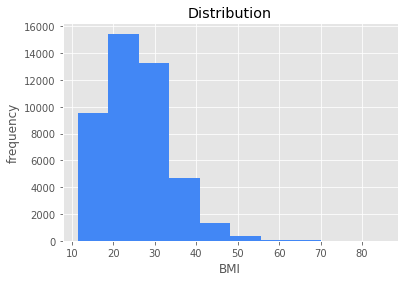

In [217]:
plt.hist(nhanes_data['BMI'], color='#4287f5')
plt.title('Distribution')
plt.xlabel('BMI')
plt.ylabel('frequency');

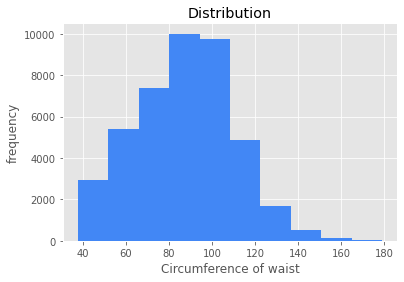

In [218]:
plt.hist(nhanes_data["Waist_Circum"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Circumference of waist')
plt.ylabel('frequency');

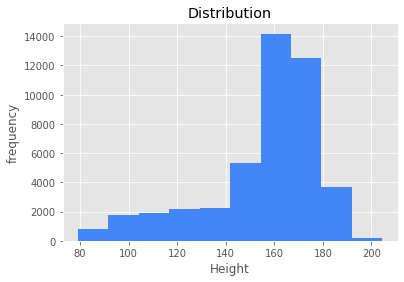

In [219]:
plt.hist(nhanes_data["Height"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Height')
plt.ylabel('frequency');

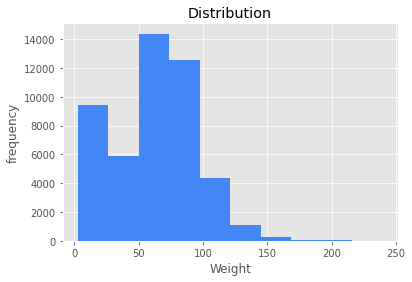

In [220]:
plt.hist(nhanes_data["Weight"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Weight')
plt.ylabel('frequency');

-</br>
#### SMOKED OVER 100 CIGARETTES IN LIFETIME - feature clean

In [221]:
# 1.0 = Yes and 2.0 = No, so changing to 1 and 0 so can work as dummy category
nhanes_data['Smoked_Hund'].replace({1.0: 1, 2.0: 0}, inplace=True)

# dropped 'refused' (code = 7.0) and 'don't know' (code=9.0) values
smoke_indices = nhanes_data[(nhanes_data['Smoked_Hund'] == 9.0)
                            | (nhanes_data['Smoked_Hund'] == 7.0)
                           ].index

nhanes_data.drop(smoke_indices, inplace=True)


# drop all null values -- we want to know this person's relationship with smoking as
#     it could be a key feature
nhanes_data = nhanes_data.dropna(axis=0, subset=['Smoked_Hund'])



In [222]:
#verify values look how want

nhanes_data['Smoked_Hund'].value_counts()

0.0    16754
1.0    13038
Name: Smoked_Hund, dtype: int64

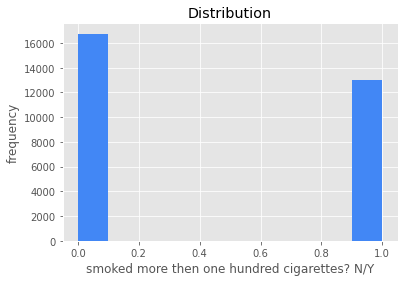

In [223]:
plt.hist(nhanes_data['Smoked_Hund'], color='#4287f5')
plt.title('Distribution')
plt.xlabel('smoked more then one hundred cigarettes? N/Y')
plt.ylabel('frequency');

-</br>
#### CURRENTLY SMOKING - feature clean

In [224]:
# nhanes code:
# 1.0 = Everyday
# 2.0 = Some days
# 3.0 = Never
# 7.0 = Refused
# Changing this to a simple yes/no answer, 1 = yes, 0 = no
nhanes_data["Curr_Smoke"].replace({1.0: 1, 2.0: 1,
                                   3.0: 0},
                                  inplace=True)

# dropped 'refused' (code = 7.0)
cur_smoke_indices = nhanes_data[(nhanes_data["Curr_Smoke"] == 7.0)
                           ].index

nhanes_data.drop(cur_smoke_indices, inplace=True)


# fill all null values -- people who had answered they hadn't smoked 
#    more than 100 times in 'Smoked_Hund'
#    so we want to just change the null values to 0 to indicate 0 times
#    they are currently smoking

nhanes_data["Curr_Smoke"].fillna(0, inplace = True)



In [225]:
nhanes_data["Curr_Smoke"].value_counts()

0.0    23684
1.0     6105
Name: Curr_Smoke, dtype: int64

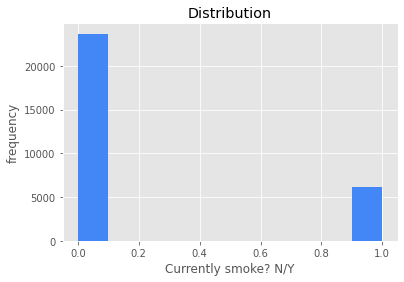

In [226]:
plt.hist(nhanes_data["Curr_Smoke"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Currently smoke? N/Y')
plt.ylabel('frequency');

-</br>
#### VIGOROUS WORK ACTIVITY - feature clean

In [227]:
# vigorous work activity
# 1.0 = Yes and 2.0 = No, so changing to 1 and 0 so can work as dummy category
# dropped 'refused' (code = 7.0) and 'don't know' (code=9.0) values

nhanes_data['Work_Vig_Act'].replace({1.0: 1, 2.0: 0}, inplace=True)

w_vig_act_indices = nhanes_data[(nhanes_data['Work_Vig_Act'] == 9.0)
                                | (nhanes_data['Work_Vig_Act'] == 7.0)
                               ].index

nhanes_data.drop(w_vig_act_indices, inplace=True)

In [228]:
#verify values look how want

nhanes_data['Work_Vig_Act'].value_counts()

0.0    24348
1.0     5436
Name: Work_Vig_Act, dtype: int64

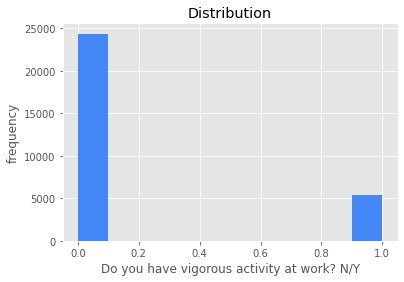

In [229]:
plt.hist(nhanes_data["Work_Vig_Act"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Do you have vigorous activity at work? N/Y')
plt.ylabel('frequency');

-</br>
#### MODERATE WORK ACTIVITY - feature clean

In [230]:
# moderate work activity
# 1.0 = Yes and 2.0 = No, so changing to 1 and 0 so can work as dummy category
# dropped 'don't know' (code=9.0) values

nhanes_data['Work_Mod_Act'].replace({1.0: 1, 2.0: 0}, inplace=True)

w_mod_act_indices = nhanes_data[(nhanes_data['Work_Mod_Act'] == 9.0)].index

nhanes_data.drop(w_mod_act_indices, inplace=True)

In [231]:
#verify values look how want

nhanes_data['Work_Mod_Act'].value_counts()

0.0    19478
1.0    10298
Name: Work_Mod_Act, dtype: int64

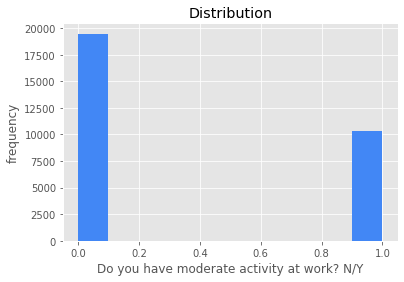

In [232]:
plt.hist(nhanes_data["Work_Mod_Act"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Do you have moderate activity at work? N/Y')
plt.ylabel('frequency');

-</br>
#### WALK OR BICYCLE ACTIVITY - feature clean

In [233]:
# walk or bicycle at least for 10 min continuous in typical week
# 1.0 = Yes and 2.0 = No, so changing to 1 and 0 so can work as dummy category
# dropped 'don't know' (code=9.0) values

nhanes_data['Walk_Bike'].replace({1.0: 1, 2.0: 0}, inplace=True)

walk_bike_indices = nhanes_data[(nhanes_data['Walk_Bike'] == 9.0)].index

nhanes_data.drop(walk_bike_indices, inplace=True)

In [234]:
nhanes_data['Walk_Bike'].value_counts()

0.0    22042
1.0     7732
Name: Walk_Bike, dtype: int64

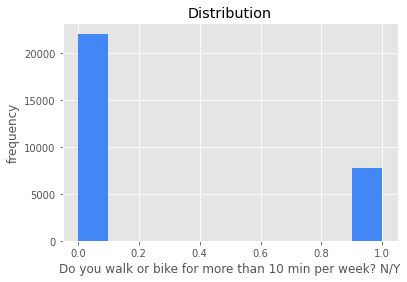

In [235]:
plt.hist(nhanes_data["Walk_Bike"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Do you walk or bike for more than 10 min per week? N/Y')
plt.ylabel('frequency');

-</br>
#### VIGOROUS RECREATIONAL ACTIVITY - feature clean

In [236]:
# vigorous-intensity fitness or activities for 10 min continuous in typical week
# 1.0 = Yes and 2.0 = No, so changing to 1 and 0 so can work as dummy category
# dropped 'don't know' (code=9.0) values

nhanes_data['Rec_Vig_Act'].replace({1.0: 1, 2.0: 0}, inplace=True)

rec_vig_indices = nhanes_data[(nhanes_data['Rec_Vig_Act'] == 9.0)
                             ].index

nhanes_data.drop(rec_vig_indices, inplace=True)

In [237]:
nhanes_data['Rec_Vig_Act'].value_counts()

0.0    23317
1.0     6456
Name: Rec_Vig_Act, dtype: int64

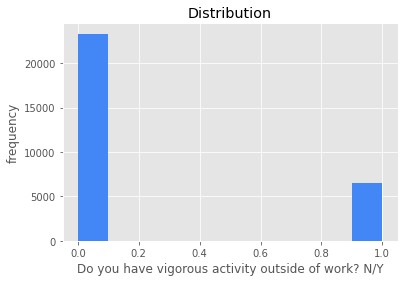

In [238]:
plt.hist(nhanes_data["Rec_Vig_Act"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Do you have vigorous activity outside of work? N/Y')
plt.ylabel('frequency');

-</br>
#### SITTING TIME - feature clean

In [239]:
# sitting time
# category uses extremely low number for 'none' -- replaced with 0
# dropped values that represent 'don't know' or 'missing'

sit_indices = nhanes_data[(nhanes_data['Sitting_Time'] == 7777.0)
                          | (nhanes_data['Sitting_Time'] == 9999.0)
                         ].index

nhanes_data['Sitting_Time'].replace({5.397605346934028e-79: 0}, inplace=True)

nhanes_data.drop(sit_indices, inplace=True)

In [240]:
nhanes_data['Sitting_Time'].value_counts()

480.0    4127
240.0    3805
180.0    3376
360.0    3331
300.0    3021
         ... 
230.0       1
81.0        1
490.0       1
140.0       1
100.0       1
Name: Sitting_Time, Length: 61, dtype: int64

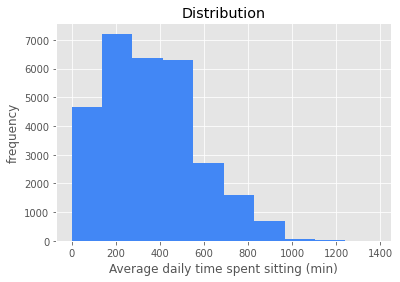

In [241]:
plt.hist(nhanes_data["Sitting_Time"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Average daily time spent sitting (min)')
plt.ylabel('frequency');

-</br>
#### AGE - feature clean

In [242]:
# dropping those that are under age 18 to focus range with assumption
#    younger than 15 are not at risk -- or would be anomaly if they do
#    and also make data more uniform for age since heavier number of 
#   those under compared to 

age_indices = nhanes_data[(nhanes_data['Age'] < 18)
                         ].index

nhanes_data.drop(age_indices, inplace=True)

In [243]:
nhanes_data.Age.unique()

array([62., 71., 52., 21., 64., 66., 30., 61., 27., 40., 72., 77., 68.,
       70., 29., 63., 48., 33., 35., 80., 74., 50., 28., 51., 44., 43.,
       37., 60., 45., 49., 24., 54., 78., 38., 46., 55., 32., 57., 76.,
       67., 25., 36., 75., 20., 41., 26., 23., 73., 58., 22., 31., 42.,
       47., 53., 69., 79., 34., 65., 59., 56., 39., 18., 19.])

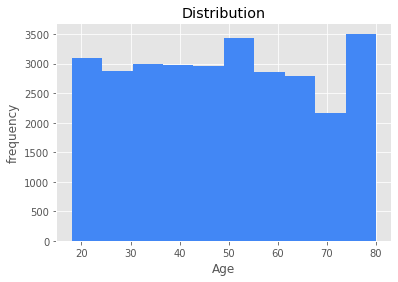

In [244]:
plt.hist(nhanes_data["Age"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Age')
plt.ylabel('frequency');

-</br>
#### GENDER - feature clean

In [245]:
# 1.0 = Male and 2.0 = Female, so changing to 0 = Male and 1 = Female
#   to work as dummy category

nhanes_data['Gender'].replace({1.0: 0, 2.0: 1}, inplace=True)

In [246]:
nhanes_data['Gender'].value_counts()

1.0    15268
0.0    14385
Name: Gender, dtype: int64

-</br>
#### RACE - feature clean

In [247]:
nhanes_data['Race'].replace({1.0: "Mexican_American", 2.0: "Other_Hispanic",
                             3.0: "Non_Hispanic_White", 4.0: "Non_Hispanic_Black",
                             5.0: "Other_Race"
                            }, inplace=True)

In [248]:
nhanes_data['Race'].value_counts()

Non_Hispanic_White    12207
Non_Hispanic_Black     6276
Mexican_American       4598
Other_Race             3375
Other_Hispanic         3197
Name: Race, dtype: int64

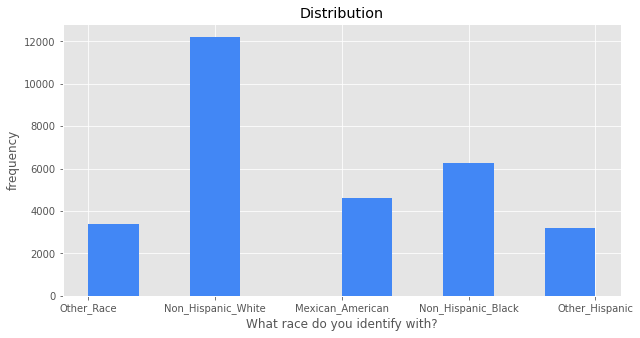

In [249]:
plt.figure(figsize=(10,5))
plt.hist(nhanes_data["Race"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('What race do you identify with?')
plt.ylabel('frequency');

-</br>
#### EATING OUT FREQUENCY- feature clean

In [250]:
# eating out
# category uses extremely low number for 'none' -- replaced with 0
# dropped values that represent 'don't know' or 'missing'
# dropped values that represent those that ate over 21 meals (code = 5555.0) -- is a very small number and easier to manage data without

nhanes_data['Eat_Out'].replace({5.397605346934028e-79: 0}, inplace=True)

eat_indices = nhanes_data[(nhanes_data['Eat_Out'] == 7777.0)
                          | (nhanes_data['Eat_Out'] == 9999.0)
                          | (nhanes_data['Eat_Out'] == 5555.0)
                         ].index

nhanes_data.drop(eat_indices, inplace=True)

In [251]:
nhanes_data['Eat_Out'].value_counts()

0.0     7089
1.0     4856
2.0     4534
3.0     3549
4.0     2147
5.0     2143
7.0     1641
10.0     833
6.0      736
14.0     542
8.0      333
12.0     263
21.0     254
15.0     228
9.0      149
20.0      72
18.0      60
11.0      56
13.0      45
16.0      45
17.0      22
19.0      20
Name: Eat_Out, dtype: int64

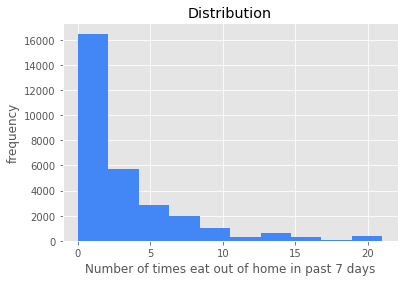

In [252]:
plt.hist(nhanes_data["Eat_Out"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Number of times eat out of home in past 7 days')
plt.ylabel('frequency');

-</br>
#### EAT READY-TO-EAT MEAL FREQUENCY - feature clean

In [253]:
# ready-to-eat
# category uses extremely low number for 'none' -- replaced with 0


nhanes_data['Ready_to_Eat'].replace({5.397605346934028e-79: 0}, inplace=True)

# dropped values that represent 'don't know' or 'missing'
# also dropped values that were over 90 because anything more would mean a person
#     is eating more than 3 meals a day that are ready-to-eat
red_eat_indices = nhanes_data[(nhanes_data['Ready_to_Eat'] == 7777.0)
                              | (nhanes_data['Ready_to_Eat'] == 9999.0)
                              | (nhanes_data['Ready_to_Eat'] == 6666.0)
                              | (nhanes_data['Ready_to_Eat'] > 90)
                             ].index

nhanes_data.drop(red_eat_indices, inplace=True)

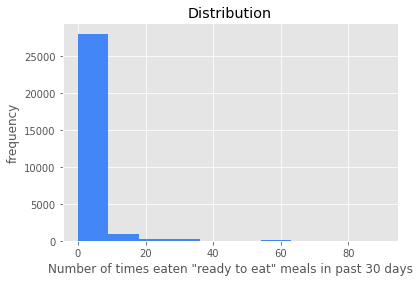

In [254]:
plt.hist(nhanes_data["Ready_to_Eat"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Number of times eaten "ready to eat" meals in past 30 days')
plt.ylabel('frequency');

-

#### FROZEN FOODS - feature clean

In [255]:
# category uses extremely low number for 'none' -- replaced with 0
nhanes_data['Frozen_Foods'].replace({5.397605346934028e-79: 0}, inplace=True)


# dropped values that represent 'don't know' or 'missing'
# also dropped values that were over 90 because anything more would mean a person
#     is eating more than 3 meals a day that are frozen foods
red_eat_indices = nhanes_data[(nhanes_data['Frozen_Foods'] == 7777.0)
                              | (nhanes_data['Frozen_Foods'] == 9999.0)
                              | (nhanes_data['Frozen_Foods'] == 6666.0)
                              | (nhanes_data['Frozen_Foods'] > 90)
                             ].index

nhanes_data.drop(red_eat_indices, inplace=True)

In [256]:
nhanes_data['Frozen_Foods'].value_counts()

0.0     18566
1.0      2574
2.0      2102
4.0      1284
3.0      1077
5.0       756
8.0       582
10.0      498
12.0      375
30.0      305
15.0      298
6.0       258
20.0      176
7.0       170
17.0      120
21.0       90
60.0       64
25.0       53
16.0       27
90.0       22
14.0       22
9.0        19
42.0        9
11.0        6
28.0        6
13.0        6
64.0        5
23.0        4
18.0        4
50.0        3
22.0        2
85.0        2
40.0        2
29.0        2
34.0        2
55.0        1
24.0        1
32.0        1
43.0        1
88.0        1
45.0        1
47.0        1
35.0        1
26.0        1
37.0        1
19.0        1
Name: Frozen_Foods, dtype: int64

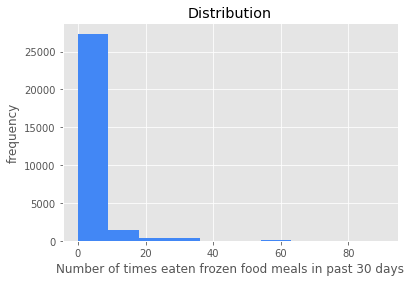

In [257]:
plt.hist(nhanes_data["Frozen_Foods"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Number of times eaten frozen food meals in past 30 days')
plt.ylabel('frequency');

-

#### ALCOHOL CONSUMPTION PAST YEAR (OVER 12) - feature clean

In [258]:
# 1.0 = Yes and 2.0 = No, so changing to 1 and 0 so can work as dummy category
nhanes_data['Twelve_Alcohol'].replace({1.0: 1, 2.0: 0}, inplace=True)

# dropped 'don't know' (code=9.0) values
yr_alc_indices = nhanes_data[(nhanes_data['Twelve_Alcohol'] == 9.0)
                             ].index

nhanes_data.drop(yr_alc_indices, inplace=True)

# drop all null values -- we want to know this person's relationship with smoking as
#     it could be a key feature
nhanes_data = nhanes_data.dropna(axis=0, subset=['Twelve_Alcohol'])

In [259]:
nhanes_data['Twelve_Alcohol'].value_counts()

1.0    18101
0.0     7542
Name: Twelve_Alcohol, dtype: int64

In [260]:
nhanes_data['Twelve_Alcohol'].isna().sum()

0

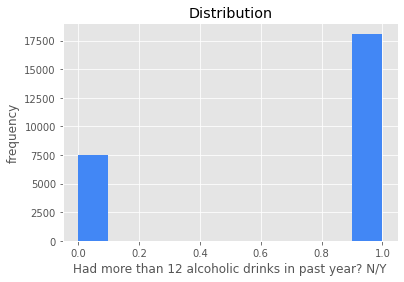

In [261]:
plt.hist(nhanes_data["Twelve_Alcohol"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Had more than 12 alcoholic drinks in past year? N/Y')
plt.ylabel('frequency');

-

### HAD MORE THAN 4/5 DRINKS IN A DAY - feature clean

In [292]:
# dropped values that represent 'don't know' or 'missing'
# a few extreme values over 30 to remove and assumed to be incorrectly
#    entered, as having over 30 drinks per day for a year would
#    seems highly unlikely
alc_amt_indices = nhanes_data[(nhanes_data['Alcohol_Amt'] == 777.0)
                              | (nhanes_data['Alcohol_Amt'] == 999.0)
                              | (nhanes_data['Alcohol_Amt'] > 30)
                             ].index

nhanes_data.drop(alc_amt_indices, inplace=True)

# fill all null values -- people who had answered they hadn't drank 
#    more than 12 times in 'Twelve_Alcohol'
#    so we want to just change the null values to 0 to indicate 0 times
#    -- risk of not being 100% accurate because they could have 
#    drank anywhere between 0-12 but want to be more accurate
#    if never drank and can assume more likely or little effect if 
#    under 12

nhanes_data["Alcohol_Amt"].fillna(0, inplace = True)

In [293]:
nhanes_data["Alcohol_Amt"].value_counts()

0.0     7308
1.0     5220
2.0     4124
3.0     2187
4.0     1170
6.0      825
5.0      686
12.0     227
8.0      218
10.0     180
7.0      156
15.0      51
9.0       34
20.0      21
11.0      14
18.0      11
14.0      10
24.0       9
16.0       8
13.0       8
30.0       3
21.0       2
25.0       2
23.0       1
19.0       1
17.0       1
Name: Alcohol_Amt, dtype: int64

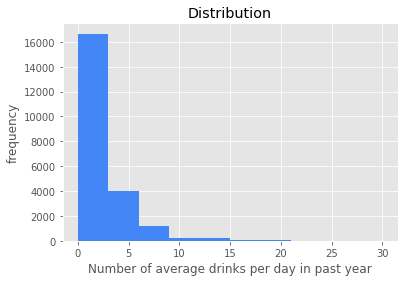

In [294]:
plt.hist(nhanes_data["Alcohol_Amt"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Number of average drinks per day in past year')
plt.ylabel('frequency');

-

#### OCCUPATION STATUS LAST WEEK- feature clean

In [295]:
# 1.0 = Working at job or business
# 2.0 = With a job or business, but not at work
# 3.0 = Looking for work
# 4.0 = Not working for job or business
# 7.0 = Refused
# 9.0 = Don't know
# Changed these to simple 'have job', 'looking for job', and 'don't have job'

nhanes_data['Job_Type'].replace({1.0: "have_job", 2.0: "not_at_work",
                                 3.0: "looking_job", 4.0: "no_job"
                                }, inplace=True)

# dropped refused or don't konw values
alc_amt_indices = nhanes_data[(nhanes_data['Job_Type'] == 7.0)
                              | (nhanes_data['Job_Type'] == 9.0)
                             ].index

nhanes_data.drop(alc_amt_indices, inplace=True)

# drop all null values -- we want to know this person's occupation status as
#     it could be a key feature
nhanes_data = nhanes_data.dropna(axis=0, subset=['Job_Type'])

In [296]:
nhanes_data["Job_Type"].value_counts()

have_job       12210
no_job          9029
looking_job      785
not_at_work      453
Name: Job_Type, dtype: int64

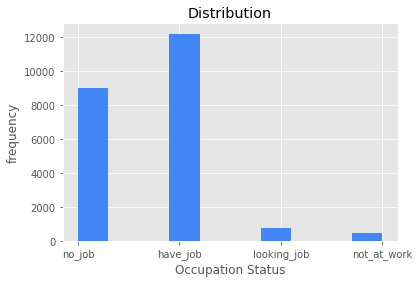

In [297]:
plt.hist(nhanes_data["Job_Type"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Occupation Status')
plt.ylabel('frequency');

-

#### NUMBER HOURS WORKED LAST WEEK - feature clean

In [298]:
# dropped values that represent 'don't know' or 'missing'
hrs_work_indices = nhanes_data[(nhanes_data['Num_Hrs_Worked_Wk'] == 77777.0)
                               | (nhanes_data['Num_Hrs_Worked_Wk'] == 99999.0)
                              ].index

nhanes_data.drop(hrs_work_indices, inplace=True)

# fill all null values -- people who had answered they are either 
#    looking for job, not at job, or have no job in 'Job Type'
#    so changed this to 0

nhanes_data["Num_Hrs_Worked_Wk"].fillna(0, inplace = True)

In [299]:
nhanes_data["Num_Hrs_Worked_Wk"].value_counts()

0.0      10267
40.0      3824
50.0       946
45.0       687
60.0       590
         ...  
106.0        1
91.0         1
69.0         1
79.0         1
102.0        1
Name: Num_Hrs_Worked_Wk, Length: 108, dtype: int64

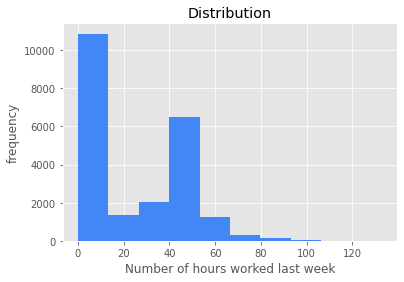

In [300]:
plt.hist(nhanes_data["Num_Hrs_Worked_Wk"], color='#4287f5')
plt.title('Distribution')
plt.xlabel('Number of hours worked last week')
plt.ylabel('frequency');

-

### CHECK FINAL SIZE OF CLEANED FEATURES DATASET

Now drop all null values >>

In [301]:
nhanes_data  = nhanes_data.dropna()

In [302]:
nhanes_data.shape

(22477, 28)

In [303]:
with open('pickles/nhanes_data.pickle', 'wb') as to_write:
    pickle.dump(nhanes_data, to_write)

## CLEAN UP TARGET VARIABLE:

Un-pickle the cleaned version of features >

In [304]:
with open('pickles/nhanes_data.pickle','rb') as read_file:
    nhanes_clean = pickle.load(read_file)

In [305]:
# Create new column for all mean of systolic readings

nhanes_clean['Systolic_Avg'] = nhanes_clean[
    ['Systolic_1Rd', 'Systolic_2Rd','Systolic_3Rd']].mean(axis=1)

In [306]:
# Create new column for all mean of diastolic readings

nhanes_clean['Diastolic_Avg'] = nhanes_clean[
    ['Diastolic_1Rd', 'Diastolic_2Rd','Diastolic_3Rd']].mean(axis=1)

In [307]:
# function to determine whether person has high blood pressure

def blood_pressure_status(row):
    if row['Systolic_Avg'] > 130 or row['Diastolic_Avg'] > 80:
        return 1
    return 0

In [308]:
# application of above function to run through entire dataframe

nhanes_clean['High_Blood_Pressure'] = nhanes_clean.apply(
    lambda row: blood_pressure_status(row), axis=1)

In [309]:
# See how many have high blood pressure in the data set (1 = high blood pressure)

nhanes_clean.High_Blood_Pressure.value_counts()

0    14603
1     7874
Name: High_Blood_Pressure, dtype: int64

In [310]:
# Delete the blood pressure reading columns now that we have 
#     represented them in 'High_Blood_Pressure'


nhanes_clean.drop(['Systolic_1Rd', 'Systolic_2Rd', 'Systolic_3Rd',
                   'Diastolic_1Rd', 'Diastolic_2Rd','Diastolic_3Rd',
                   'Systolic_Avg','Diastolic_Avg'], axis=1, inplace=True)

In [311]:
# Also no longer need patient number 

nhanes_clean.drop('Patient_ID', axis=1, inplace=True)

In [312]:
nhanes_clean.shape

(22477, 22)

In [313]:
# Reset index

nhanes_clean.reset_index(inplace = True)

In [314]:
nhanes_clean.drop('index', axis=1, inplace=True)

In [315]:
nhanes_clean.head()

,BMI,Waist_Circum,Height,Weight,Eat_Out,Ready_to_Eat,Frozen_Foods,Smoked_Hund,Curr_Smoke,Work_Vig_Act,...,Rec_Vig_Act,Sitting_Time,Gender,Age,Race,Twelve_Alcohol,Alcohol_Amt,Job_Type,Num_Hrs_Worked_Wk,High_Blood_Pressure
0,58.04,156.3,154.7,138.9,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,720.0,1.0,62.0,Other_Race,0.0,0.0,no_job,0.0,0
1,30.05,109.5,167.1,83.9,1.0,0.0,2.0,1.0,0.0,0.0,...,0.0,240.0,0.0,71.0,Non_Hispanic_White,0.0,0.0,no_job,0.0,1
2,27.56,95.4,154.4,65.7,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,180.0,0.0,52.0,Mexican_American,1.0,5.0,have_job,50.0,0
3,23.34,79.5,182.7,77.9,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,300.0,0.0,21.0,Non_Hispanic_Black,1.0,4.0,looking_job,0.0,0
4,33.64,117.0,173.8,101.6,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,180.0,0.0,64.0,Mexican_American,1.0,4.0,have_job,40.0,0


0    0.649686
1    0.350314
Name: High_Blood_Pressure, dtype: float64


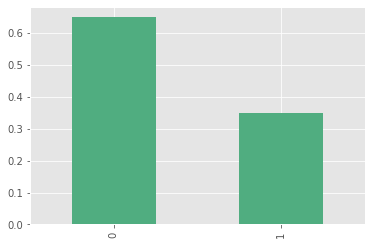

In [316]:
target_pcts = nhanes_clean.High_Blood_Pressure.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar', color='#50ad80')

Now that dataset is completely cleaned, pickle it and prepare for modeling >

In [317]:
with open('pickles/nhanes_clean.pickle', 'wb') as to_write:
    pickle.dump(nhanes_clean, to_write)

In [318]:
nhanes_clean.to_csv('csv/nhanes_clean.csv')